In [42]:
#Libraries
import sklearn as sk
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.pipeline import Pipeline
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import math
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
cwd = os.getcwd()
cwd

'/home/jupyter/Data'

# Load data and EDA

In [3]:
#Import datasets
df_churn = pd.read_csv("../Data/Customers_and_Churn.csv")


df_segm = pd.read_csv('../Data/Online_Retail.csv',encoding="ISO-8859-1",
                         dtype={'CustomerID': str,'InvoiceID': str})

In [4]:
# Preview the first 5 lines of the loaded data 
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Preview the first 5 lines of the loaded data 
df_segm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [6]:
#Shapes
print(df_churn.shape)
print(df_segm.shape)

(10000, 14)
(541909, 8)


In [7]:
#QuickEDA
df_churn.info()
#No 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df_segm.info()
#No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [9]:
Churn_rate = df_churn['Exited'].value_counts() / df_churn.shape[0]
print(Churn_rate)
Churn_rate = Churn_rate.to_frame()

#sns.catplot(x=Churn_rate.index
#            , y=Churn_rate.Exited
#            , data = Churn_rate
#            , kind='bar')
#plt.show()

#Churn is about 20%

0    0.7963
1    0.2037
Name: Exited, dtype: float64


In [10]:
df_pre_churn = df_churn.copy()

#Remove unnecessary data: RowNumber, Surname
df_pre_churn=df_pre_churn.drop(['RowNumber','Surname'],axis=1)

#Convert customerID into index
#df_pre_churn = df_pre_churn.set_index('CustomerId')

#Split x and y
y=df_pre_churn['Exited']
#x=df_pre_churn.drop(['Exited'],axis=1)
x=df_pre_churn
x.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
#Encode categorical variables
# Gender
le = preprocessing.LabelEncoder()
x['Gender'] = le.fit_transform(x['Gender'])
x.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
x.dtypes

CustomerId           int64
CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
#Geography
#Geo = ColumnTransformer(transformers = [('encoder', preprocessing.OneHotEncoder(), [1])] , remainder = "passthrough")
#x2 = Geo.fit_transform(x)
#x= pd.DataFrame(data=x2[1:,1:], index=x2[1:,0], columns=x2[0,1:]) 



ct = ColumnTransformer(transformers = [('encoder', preprocessing.OneHotEncoder(), [2])] , remainder = "passthrough")
#x.head()

In [14]:
x = np.array(ct.fit_transform(x))

In [15]:
x = pd.DataFrame(data=x, columns= ["Geo1","Geo2", "Geo3","CustomerId","CreditScore", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember","EstimatedSalary","Exited"])
x

,Geo1,Geo2,Geo3,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,0.0,15634602.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,0.0,0.0,1.0,15647311.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,1.0,0.0,0.0,15619304.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,1.0,0.0,0.0,15701354.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,0.0,0.0,1.0,15737888.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,15606229.0,771.0,1.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0
9996,1.0,0.0,0.0,15569892.0,516.0,1.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0
9997,1.0,0.0,0.0,15584532.0,709.0,0.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0
9998,0.0,1.0,0.0,15682355.0,772.0,1.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0


In [16]:
y.to_frame()

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [17]:
x = x.set_index('CustomerId')
x.head()

,Geo1,Geo2,Geo3,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,,
15634602.0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
15647311.0,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
15619304.0,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
15701354.0,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
15737888.0,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


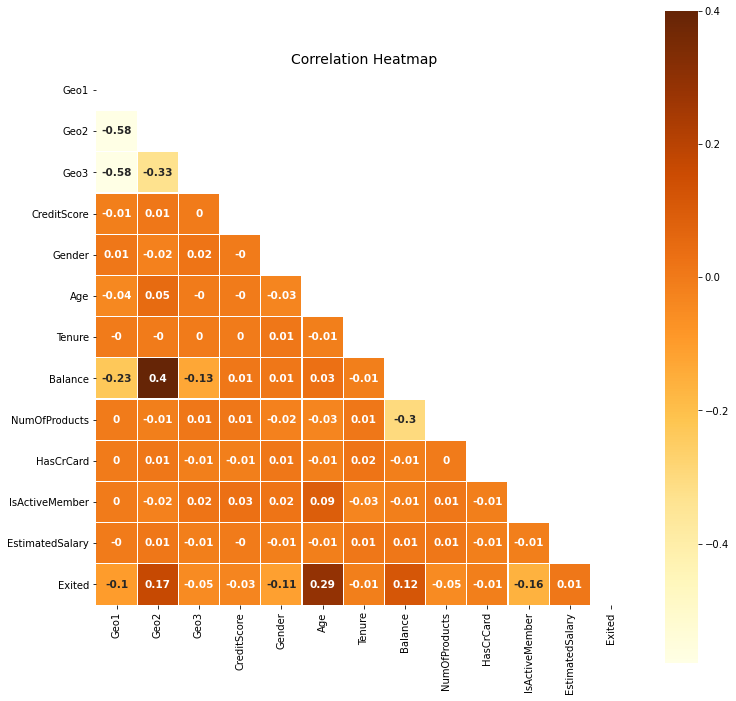

In [18]:
#Ref: https://medium.com/analytics-vidhya/telecom-churn-prediction-model-aa5c71ef944c
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri
    fig,ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()
#var_corr = round(x.drop(columns=['Geo1','Geo2','Geo3']).corr(),2)
var_corr = round(x.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Correlation Heatmap'
                       ,mask_uppertri = True)

There seems to be a slight correlations between age and churn, Balance and Location, and Balance and Number of products.

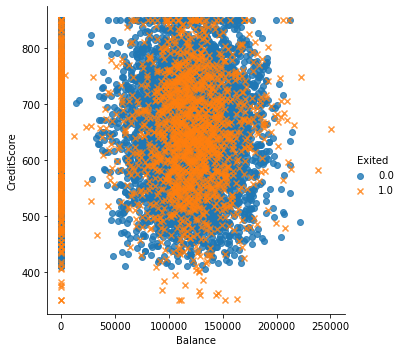

In [19]:
#Explore some 
sns.lmplot(x='Balance'
           ,y='CreditScore'
           ,data=x
           ,hue='Exited'
            ,fit_reg=False
            ,markers=["o", "x"])
plt.show()

In [20]:
x=x.drop(['Exited'],axis=1)

# Helping functions

In [21]:
#Learning curve
#Ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 4, figsize=(25, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Accuracy")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, train_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Accuracy")
    axes[2].set_title("Performance of the model")
    
    # Adding an extra curve: model training time vs clusters
    axes[3].grid()
    kclusters = list(np.arange(2,24,2))
    axes[3].plot(kclusters, fit_times_mean)
    #plt.grid(True)
    axes[3].set_xlabel('No. Clusters')
    axes[3].set_ylabel('Training Time (s)')
    axes[3].set_title('Training Time: ')
    #plt.show()

    return plt

You are to implement (or find the code for) six algorithms. The first two are clustering algorithms:

k-means clustering
Expectation Maximization
You can choose your own measures of distance/similarity. Naturally, you'll have to justify your choices, but you're practiced at that sort of thing by now.

The last four algorithms are dimensionality reduction algorithms:

PCA
ICA
Randomized Projections
Any other feature selection algorithm you desire
You are to run a number of experiments. Come up with at least two datasets. If you'd like (and it makes a lot of sense in this case) you can use the ones you used in the first assignment.

Run the clustering algorithms on the datasets and describe what you see.
Apply the dimensionality reduction algorithms to the two datasets and describe what you see.
Reproduce your clustering experiments, but on the data after you've run dimensionality reduction on it. Yes, that’s 16 combinations of datasets, dimensionality reduction, and clustering method. You should look at all of them, but focus on the more interesting findings in your report.
Apply the dimensionality reduction algorithms to one of your datasets from assignment #1 (if you've reused the datasets from assignment #1 to do experiments 1-3 above then you've already done this) and rerun your neural network learner on the newly projected data.
Apply the clustering algorithms to the same dataset to which you just applied the dimensionality reduction algorithms (you've probably already done this), treating the clusters as if they were new features. In other words, treat the clustering algorithms as if they were dimensionality reduction algorithms. Again, rerun your neural network learner on the newly projected data.

# Run the clustering algorithms

# Split and Normilize

In [22]:
#Splitting data into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify=y)

#feature Scaling - Standarization
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


## K-means

We already know that there are 2 clusters on this data set: Churned and not churned. Reasons for churning can vary widely, but in most cases there are some common grounds between customers (users share some similar behavior); so, let's take advatange that we already have that label to test the unsupervised learning algorithms by trying to predict those 2 clusters and compare to the actual label.

Text(0.5, 1.0, 'Elbow curve')

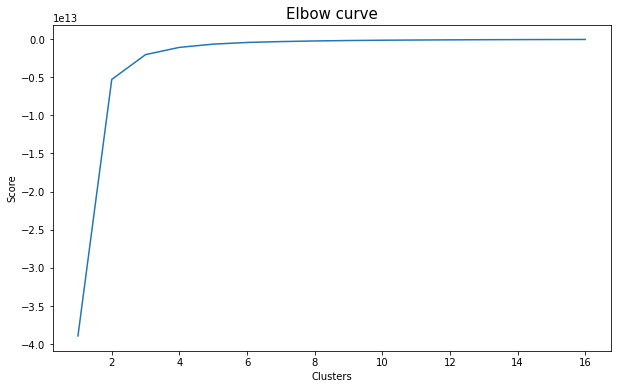

In [23]:
# although we already know we want to obtain 2 clusters, let's also valdiate if there are many groups that can be formed using this data. Let's plot using some of the features we know are related
from sklearn.cluster import KMeans
df_kmeans_data = x[['Balance','NumOfProducts']]

k = range(1,17)
kmeans = [KMeans(n_clusters=i) for i in k]

score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]

plt.figure(figsize=(10,6))
plt.plot(k,score)
plt.xlabel("Clusters")
plt.ylabel("Score")
plt.title("Elbow curve",fontsize=15)

# There is no clear elbow, but between 2 or 3 seems reasonable

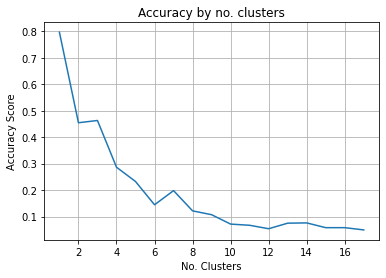

In [24]:
#We Know we want 2 clusters, but let's see how the accuracy changes as clusters increases. 
#Specifically, let's check if the cluster classification is better than classifying all members as a single class.
scores_t = []
for n in range(1,18):
    KM_model = KMeans(n_clusters=n, random_state=0)

    KM_model_fit = KM_model.fit(X_train,y_train)
    
    y_pred =  KM_model_fit.predict(X_test)
    
    scores_t.append(accuracy_score(y_test,y_pred))

# plot clusters vs accuracy
kclusters = list(np.arange(1,18,1))
fig, ax = plt.subplots()
ax.plot(kclusters, scores_t)
ax.grid(True)
ax.set_xlabel('No. Clusters')
ax.set_ylabel('Accuracy Score')
ax.set_title('Accuracy by no. clusters')
plt.show()

In [25]:
#Create and fit model
KM_model = KMeans(n_clusters=2,n_init=10,random_state=100) 
KM_model_fit = KM_model.fit(X_train,y_train)

In [26]:
#Predict labels
y_pred =  KM_model_fit.predict(X_test)
y_pred

#Churn on test set
unique_t, counts_t = np.unique(y_test, return_counts=True)
Churn_rate_test = counts_t / len(y_test)
print("Churn on test dataset:")
print(Churn_rate_test)

#Predicted churn
unique, counts = np.unique(y_pred, return_counts=True)
Churn_rate_y = counts / len(y_pred)
print("Churned predicted by Kmeans:")
print(Churn_rate_y)
#print(counts)
#Churn_rate_y = Churn_rate.to_frame()
#dict(zip(unique, counts))
#counts

Churn on test dataset:
[0.7965 0.2035]
Churned predicted by Kmeans:
[0.503 0.497]


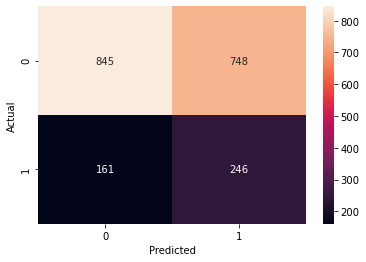

In [27]:
#Create confussion matrix to compare
#cm= confusion_matrix(y_test,y_pred)

#Confusion Matrix 
#tn, fp, fn, tp = cm.ravel()
#print(tn, fp, fn, tp)

data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

In [28]:
#Calculate F1 and accuray score
print("F1:")
print(f1_score(y_test,y_pred))
print("Accuracy")
print(accuracy_score(y_test,y_pred))

F1:
0.35117773019271953
Accuracy
0.5455


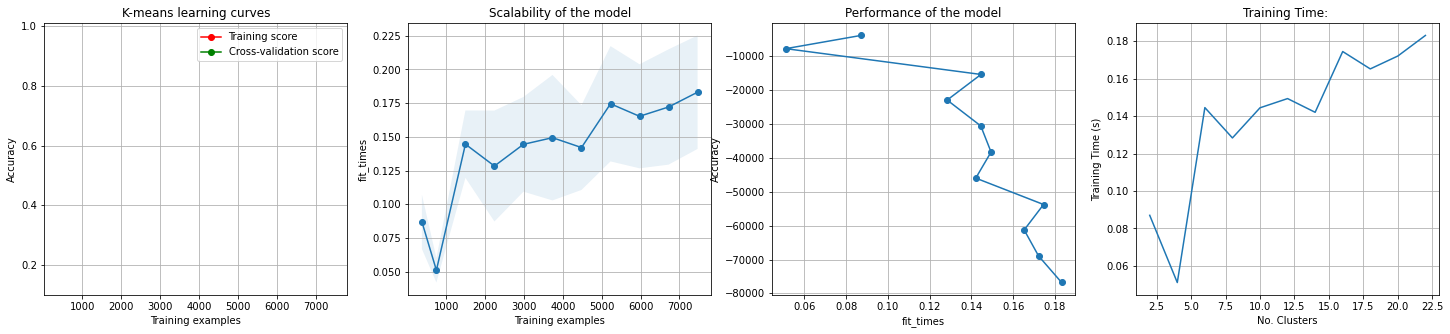

In [29]:
#Additional supporting graphs
g2 = plot_learning_curve(KM_model_fit, "K-means learning curves", X_train, y_train,
                        ylim = [0.1,1.01], cv = 15, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

#y_pred_pruned =dt_prunned2.predict(X_test)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred_pruned))
#cross_val_score(clf, iris.data, iris.target, cv=10)

## Expectation Maximization

Text(0.5, 1.0, 'Elbow curve EM')

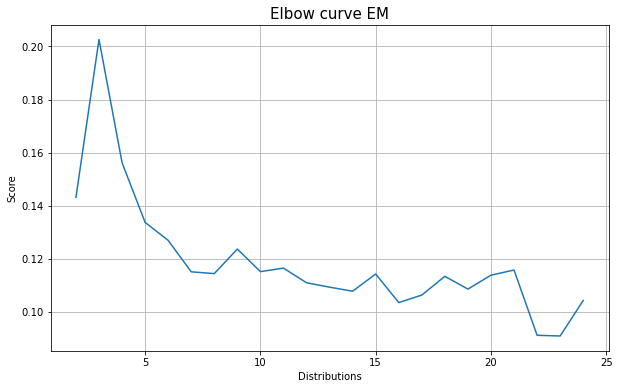

In [30]:
# although we already know we want to obtain 2 clusters, let's also valdiate if there are many groups that can be formed using this data. Let's plot using some of the features we know are related
from sklearn.mixture import GaussianMixture as EM
from sklearn.metrics import silhouette_score as sil_score, f1_score, homogeneity_score

kdist = list(np.arange(2,25,1))
scores_EM_b = []

for k in kdist:
    em = EM(n_components=k,covariance_type='diag',n_init=1,warm_start=True,random_state=100).fit(X_train)
    labels = em.predict(X_train)
    scores_EM_b.append(sil_score(X_train, labels))

    
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(kdist, scores_EM_b)
plt.xlabel("Distributions")
plt.ylabel("Score")
plt.title("Elbow curve EM",fontsize=15)

# There is no clear elbow, but between 2 or 3 seems reasonable

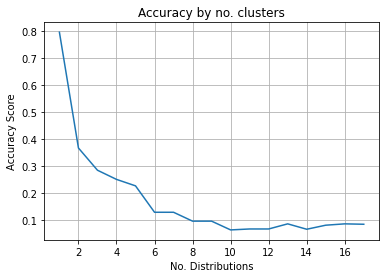

In [31]:
#We Know we want 2 clusters, but let's see how the accuracy changes as clusters increases. 
#Specifically, let's check if the cluster classification is better than classifying all members as a single class.
scores_t_EM = []
for n in range(1,18):
    EM_model = EM(n_components=n,covariance_type='diag',n_init=1,warm_start=True,random_state=100)
    EM_model_fit = EM_model.fit(X_train,y_train)
    
    y_pred_EM =  EM_model_fit.predict(X_test)
    
    scores_t_EM.append(accuracy_score(y_test,y_pred_EM))

# plot clusters vs accuracy
kdis = list(np.arange(1,18,1))
fig, ax = plt.subplots()
ax.plot(kdis, scores_t_EM)
ax.grid(True)
ax.set_xlabel('No. Distributions')
ax.set_ylabel('Accuracy Score')
ax.set_title('Accuracy by no. clusters')
plt.show()

In [32]:
#Build and Fit model
EM_model = EM(n_components=2,covariance_type='diag',n_init=1,warm_start=True,random_state=100).fit(X_train)
EM_model_fit = EM_model.fit(X_train,y_train)

#Predict labels
y_pred_EM =  EM_model_fit.predict(X_test)
y_pred_EM

#Churn on test set
unique_t, counts_t = np.unique(y_test, return_counts=True)
Churn_rate_test = counts_t / len(y_test)
print("Churn on test dataset:")
print(Churn_rate_test)

#Predicted churn
unique, counts = np.unique(y_pred_EM, return_counts=True)
Churn_rate_y_EM = counts / len(y_pred_EM)
print("Churned predicted by EM:")
print(Churn_rate_y_EM)
#print(counts)
#Churn_rate_y = Churn_rate.to_frame()
#dict(zip(unique, counts))
#counts

Churn on test dataset:
[0.7965 0.2035]
Churned predicted by EM:
[0.2445 0.7555]


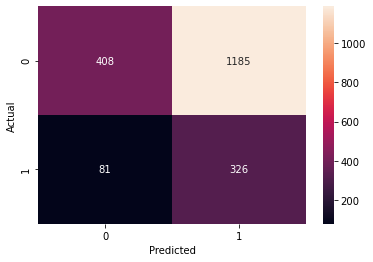

F1:
0.33993743482794575
Accuracy
0.367


In [33]:
#Create confussion matrix to compare
#cm= confusion_matrix(y_test,y_pred)

#Confusion Matrix 
#tn, fp, fn, tp = cm.ravel()
#print(tn, fp, fn, tp)

data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred_EM
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

#Calculate F1 and accuracy
print("F1:")
print(f1_score(y_test,y_pred_EM))
print("Accuracy")
print(accuracy_score(y_test,y_pred_EM))

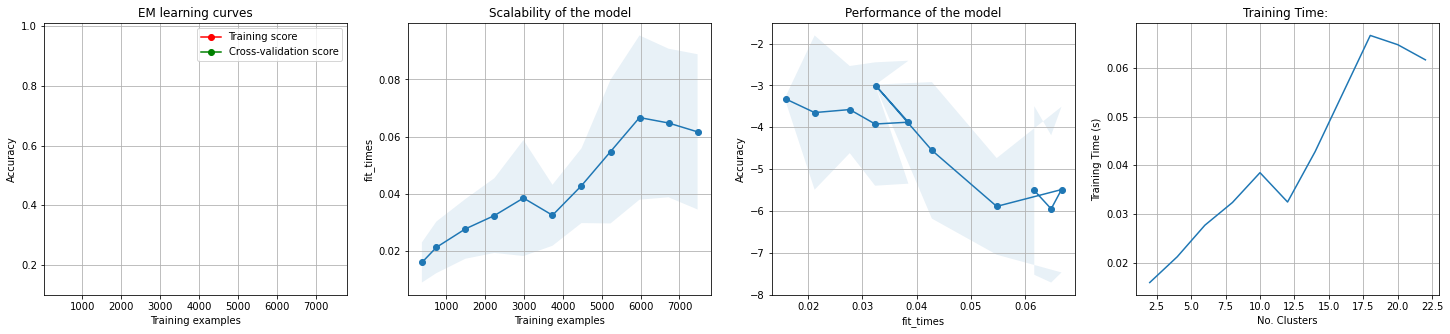

In [34]:
#Additional supporting graphs
g1 = plot_learning_curve(EM_model_fit, "EM learning curves", X_train, y_train,
                        ylim = [0.1,1.01], cv = 15, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

#y_pred_pruned =dt_prunned2.predict(X_test)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred_pruned))
#cross_val_score(clf, iris.data, iris.target, cv=10)

# Apply the dimensionality reduction algorithms

## PCA

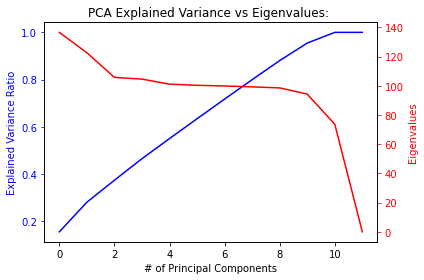

In [35]:
#Ref: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
from sklearn.decomposition import PCA

# Separating out the features
x_PCA = x.copy()
#x_PCA = x_PCA.drop(columns= ['Geo1', 'Geo2', 'Geo3', 'Tenure'])
# Standardizing the features
x_PCA = StandardScaler().fit_transform(x_PCA)

pca = PCA(random_state=0).fit(x_PCA)

cum_var = np.cumsum(pca.explained_variance_ratio_)

fig, ax1 = plt.subplots()
ax1.plot(list(range(len(pca.explained_variance_ratio_))), cum_var, 'b-')
ax1.set_xlabel('# of Principal Components')
    # Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Explained Variance Ratio', color='b')
ax1.tick_params('y', colors='b')
plt.grid(False)

ax2 = ax1.twinx()
ax2.plot(list(range(len(pca.singular_values_))), pca.singular_values_, 'r-')
ax2.set_ylabel('Eigenvalues', color='r')
ax2.tick_params('y', colors='r')
plt.grid(False)

plt.title("PCA Explained Variance vs Eigenvalues: ")
fig.tight_layout()
plt.show()

In [36]:
## 6 PC seems like a good number, we retain 80% of the data and reduced by 50% the features.
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(x_PCA)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7'])

finalDf = pd.concat([principalDf, y.to_frame().reset_index()[['Exited']]], axis = 1)
finalDf

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,Exited
0,-1.399128,-0.582200,-0.837377,0.822783,0.455010,0.955951,-0.225965,1
1,0.656222,1.714658,-1.781260,0.591485,2.077297,0.142211,-0.223126,0
2,-0.769508,-0.734659,2.072312,0.081965,0.211126,1.619353,0.902164,1
3,-1.682327,-0.258430,0.600436,0.829336,2.063284,-0.362797,-1.196717,0
4,1.001920,1.521599,-1.617202,0.706661,0.016331,-0.628333,-1.186785,0
...,...,...,...,...,...,...,...,...
9995,-1.723041,-0.220867,0.886222,-0.152909,-0.863942,-0.846688,-0.500459,0
9996,-1.061108,-0.789180,-0.613669,-1.015715,-1.422243,0.704879,1.503186,0
9997,-1.449490,-0.474377,-0.837632,0.625492,0.445260,-0.377276,-0.560263,1
9998,1.465701,-0.254560,1.325498,0.434708,-0.759291,-0.806278,-0.934087,1


## ICA

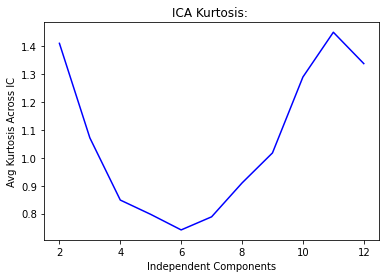

In [37]:
from sklearn.decomposition import FastICA

# Separating out the features
x_ICA = x.copy()
# Standardizing the features
x_ICA = StandardScaler().fit_transform(x_ICA)

dims = list(np.arange(2,12,1))
dims.append(x_ICA.shape[1])
    
ica = FastICA(random_state=0).fit(x_ICA)

kurt = []

for dim in dims:
    ica.set_params(n_components=dim)
    tmp = ica.fit_transform(x_ICA)
    tmp = pd.DataFrame(tmp)
    tmp = tmp.kurt(axis=0)
    kurt.append(tmp.abs().mean())

plt.figure()
plt.title("ICA Kurtosis: ")
plt.xlabel("Independent Components")
plt.ylabel("Avg Kurtosis Across IC")
plt.plot(dims, kurt, 'b-')
plt.grid(False)
plt.show()


In [38]:
## 2 IC seems like a good number.
ica = FastICA(n_components=6)
IndComponents = ica.fit_transform(x_ICA)
IndComponentsDf = pd.DataFrame(data = IndComponents
             , columns = ['IC 1', 'IC 2', 'IC 3', 'IC 4', 'IC 5', 'IC 6'])

finalDf_ICA = pd.concat([IndComponentsDf, y.to_frame().reset_index()[['Exited']]], axis = 1)
finalDf_ICA

,IC 1,IC 2,IC 3,IC 4,IC 5,IC 6,Exited
0,-0.002928,-0.003180,-0.004883,-0.011646,-0.006185,0.012106,1
1,0.015329,-0.011753,-0.015316,0.009804,-0.005423,0.014994,0
2,-0.012110,0.013065,0.006458,-0.005456,0.012890,0.012726,1
3,0.016526,0.008610,-0.001681,-0.010540,0.003147,0.014471,0
4,0.006992,-0.007361,-0.009480,0.011384,-0.014153,-0.001891,0
...,...,...,...,...,...,...,...
9995,-0.000278,0.012299,0.000225,-0.010234,0.000793,-0.011050,0
9996,-0.015088,-0.006420,-0.002783,-0.010734,0.001627,-0.009072,0
9997,0.006623,-0.001510,-0.003808,-0.011652,-0.007391,0.002923,1
9998,-0.000208,0.009342,0.013907,0.009154,-0.001644,-0.006892,1


## Randomized Projections

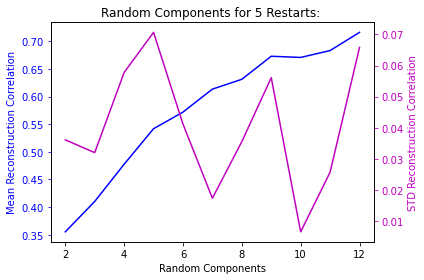

In [39]:
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.random_projection import GaussianRandomProjection as GRP, SparseRandomProjection as RCA
from sklearn.ensemble import RandomForestClassifier as RFC
from itertools import product
from collections import defaultdict
from sklearn.metrics.pairwise import pairwise_distances

# Separating out the features
x_RCA = x.copy()
# Standardizing the features
x_RCA = StandardScaler().fit_transform(x_RCA)

tmp = defaultdict(dict)


def pairwiseDistCorr(X1,X2):
    assert X1.shape[0] == X2.shape[0]
    
    d1 = pairwise_distances(X1)
    d2 = pairwise_distances(X2)
    return np.corrcoef(d1.ravel(),d2.ravel())[0,1]


for i,dim in product(range(5),dims):
    rca = RCA(random_state=i, n_components=dim)
    assert rca.fit_transform(x_RCA).shape[0] == x_RCA.shape[0]
    
    d1 = pairwise_distances(rca.fit_transform(x_RCA))
    d2 = pairwise_distances(x_RCA)
    
    tmp[dim][i] = np.corrcoef(d1.ravel(),d2.ravel())[0,1]
tmp = pd.DataFrame(tmp).T
mean_recon = tmp.mean(axis=1).tolist()
std_recon = tmp.std(axis=1).tolist()

fig, ax1 = plt.subplots()
ax1.plot(dims,mean_recon, 'b-')
ax1.set_xlabel('Random Components')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Mean Reconstruction Correlation', color='b')
ax1.tick_params('y', colors='b')
plt.grid(False)

ax2 = ax1.twinx()
ax2.plot(dims,std_recon, 'm-')
ax2.set_ylabel('STD Reconstruction Correlation', color='m')
ax2.tick_params('y', colors='m')
plt.grid(False)

plt.title("Random Components for 5 Restarts: ")
fig.tight_layout()
plt.show()

In [40]:
## 2 IC seems like a good number.
rca = RCA(n_components=5)
RanComponents = rca.fit_transform(x_RCA)
RanComponentsDf = pd.DataFrame(data = RanComponents
             , columns = ['RC 1', 'RC 2', 'RC 3', 'RC 4', 'RC 5'])

finalDf_RCA = pd.concat([RanComponentsDf, y.to_frame().reset_index()[['Exited']]], axis = 1)
finalDf_RCA

,RC 1,RC 2,RC 3,RC 4,RC 5,Exited
0,-1.556401,-0.329975,1.138650,0.758764,-1.373751,1
1,-0.343645,-2.258173,1.521196,0.758764,-1.816192,0
2,3.246628,1.335502,0.419414,-2.103417,2.025545,1
3,-0.579903,1.335502,0.737484,-0.672326,-1.258695,0
4,-1.871473,-2.258173,-0.850773,0.758764,2.866129,0
...,...,...,...,...,...,...
9995,-1.199983,1.335502,-1.033841,-0.672326,2.303332,0
9996,0.095986,-0.329975,-0.276779,0.758764,0.036600,0
9997,-2.331501,-0.329975,-1.075505,0.758764,-0.127903,1
9998,-0.207068,1.335502,-0.466831,-0.672326,-0.134676,1


## LDA

In [43]:
data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[845 748]
 [161 246]]
              precision    recall  f1-score   support

           0       0.84      0.53      0.65      1593
           1       0.25      0.60      0.35       407

    accuracy                           0.55      2000
   macro avg       0.54      0.57      0.50      2000
weighted avg       0.72      0.55      0.59      2000



In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Separating out the features
#x_LDA = x.copy()

#X_train_LDA, X_test_LDA, y_train_LDA, y_test_LDA = train_test_split(finalDf.drop(columns='Exited'), finalDf['Exited'], test_size = 0.2, random_state = 0, stratify=y)

# Standardizing the features
#x_LDA = StandardScaler().fit_transform(x_LDA)

#clf = LDA()
#clf.fit(x_LDA, y)
#LDA(n_components=None, priors=None, shrinkage=None, solver='svd',
#  store_covariance=False, tol=0.0001)


lda_0 = LDA()
lda_0.fit(X_train, y_train)
y_test_pred_0 = lda_0.predict(X_test)
print(confusion_matrix(y_test, y_test_pred_0))
print(classification_report(y_test, y_test_pred_0))


[[1518   75]
 [ 308   99]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1593
           1       0.57      0.24      0.34       407

    accuracy                           0.81      2000
   macro avg       0.70      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000



# Reproduce clustering experiments with new reduced datasets

## PCA

In [45]:
#Splitting data into test and train datasets
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(finalDf.drop(columns='Exited'), finalDf['Exited'], test_size = 0.2, random_state = 0, stratify=y)


### Kmeans

Churn on test dataset:
[0.7965 0.2035]
Churned predicted by Kmeans:
[0.503 0.497]


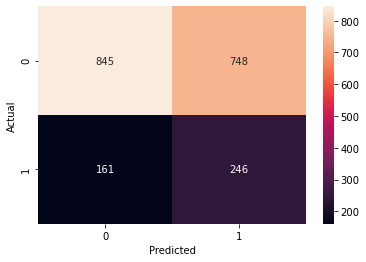

F1:
0.35117773019271953
Accuracy
0.5455


In [46]:
#Create and fit model
KM_model_PCA = KMeans(n_clusters=2,n_init=10,random_state=100) 
KM_model_fit_PCA = KM_model_PCA.fit(X_train_PCA,y_train_PCA)

#Predict labels
y_pred_PCA =  KM_model_fit_PCA.predict(X_test_PCA)

#Churn on test set
unique_t_PCA, counts_t_PCA = np.unique(y_test_PCA, return_counts=True)
Churn_rate_test_PCA = counts_t_PCA / len(y_test_PCA)
print("Churn on test dataset:")
print(Churn_rate_test_PCA)

#Predicted churn
unique_PCA, counts_PCA = np.unique(y_pred_PCA, return_counts=True)
Churn_rate_y_PCA = counts_PCA / len(y_pred_PCA)
print("Churned predicted by Kmeans:")
print(Churn_rate_y_PCA)
#print(counts)
#Churn_rate_y = Churn_rate.to_frame()
dict(zip(unique_PCA, counts_PCA))
#counts

data1 = {'y_Actual':   y_test_PCA,
        'y_Predicted': y_pred_PCA
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

#Calculate F1 and accuracy
print("F1:")
print(f1_score(y_test_PCA,y_pred_PCA))
print("Accuracy")
print(accuracy_score(y_test_PCA,y_pred_PCA))

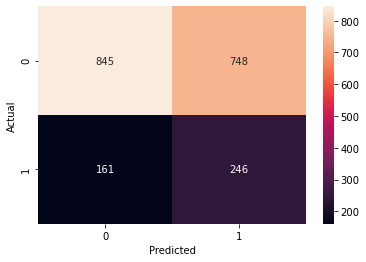

F1:
0.35117773019271953
Accuracy
0.5455


In [47]:
#Reprint original cf to compare
data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

#Calculate F1 and accuray score
print("F1:")
print(f1_score(y_test,y_pred))
print("Accuracy")
print(accuracy_score(y_test,y_pred))

### EM

Churn on test dataset:
[0.7965 0.2035]
Churned predicted by EM:
[0.752 0.248]


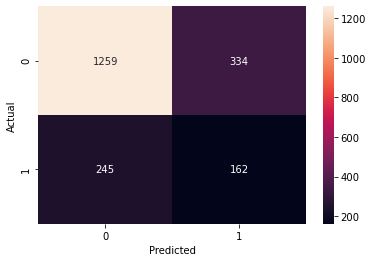

F1:
0.3588039867109635
Accuracy
0.7105


In [48]:
#Build and Fit model
EM_model_PCA = EM(n_components=2,covariance_type='diag',n_init=1,warm_start=True,random_state=100).fit(X_train_PCA)
EM_model_fit_PCA = EM_model_PCA.fit(X_train_PCA,y_train_PCA)

#Predict labels
y_pred_EM_PCA =  EM_model_fit_PCA.predict(X_test_PCA)
y_pred_EM_PCA

#Churn on test set
unique_t_PCA, counts_t_PCA = np.unique(y_test_PCA, return_counts=True)
Churn_rate_test_PCA = counts_t_PCA / len(y_test_PCA)
print("Churn on test dataset:")
print(Churn_rate_test_PCA)

#Predicted churn
unique_EM_PCA, counts_EM_PCA = np.unique(y_pred_EM_PCA, return_counts=True)
Churn_rate_y_EM_PCA = counts_EM_PCA / len(y_pred_EM_PCA)
print("Churned predicted by EM:")
print(Churn_rate_y_EM_PCA)
#print(counts)
#Churn_rate_y = Churn_rate.to_frame()
#dict(zip(unique, counts))
#counts

#Create confussion matrix to compare
#cm= confusion_matrix(y_test,y_pred)

#Confusion Matrix 
#tn, fp, fn, tp = cm.ravel()
#print(tn, fp, fn, tp)

data1 = {'y_Actual':   y_test_PCA,
        'y_Predicted': y_pred_EM_PCA
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

#Calculate F1 and accuracy
print("F1:")
print(f1_score(y_test_PCA,y_pred_EM_PCA))
print("Accuracy")
print(accuracy_score(y_test_PCA,y_pred_EM_PCA))

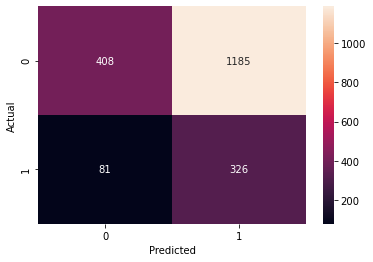

F1:
0.33993743482794575
Accuracy
0.367


In [49]:
#Create confussion matrix to compare
data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred_EM
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

#Calculate F1 and accuracy
print("F1:")
print(f1_score(y_test,y_pred_EM))
print("Accuracy")
print(accuracy_score(y_test,y_pred_EM))

## ICA

In [50]:
#Splitting data into test and train datasets
X_train_ICA, X_test_ICA, y_train_ICA, y_test_ICA = train_test_split(finalDf_ICA.drop(columns='Exited'), finalDf_ICA['Exited'], test_size = 0.2, random_state = 0, stratify=y)


### Kmeans

Churn on test dataset:
[0.7965 0.2035]
Churned predicted by Kmeans:
[0.497 0.503]


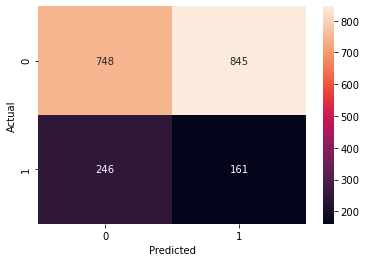

F1:
0.2278839348903043
Accuracy
0.4545


In [51]:
#Create and fit model
KM_model_ICA = KMeans(n_clusters=2,n_init=10,random_state=100) 
KM_model_fit_ICA = KM_model_ICA.fit(X_train_ICA,y_train_ICA)

#Predict labels
y_pred_ICA =  KM_model_fit_ICA.predict(X_test_ICA)

#Churn on test set
unique_t_ICA, counts_t_ICA = np.unique(y_test_ICA, return_counts=True)
Churn_rate_test_ICA = counts_t_ICA / len(y_test_ICA)
print("Churn on test dataset:")
print(Churn_rate_test_ICA)

#Predicted churn
unique_ICA, counts_ICA = np.unique(y_pred_ICA, return_counts=True)
Churn_rate_y_ICA = counts_ICA / len(y_pred_ICA)
print("Churned predicted by Kmeans:")
print(Churn_rate_y_ICA)
#print(counts)
#Churn_rate_y = Churn_rate.to_frame()
dict(zip(unique_ICA, counts_ICA))
#counts

data1 = {'y_Actual':   y_test_ICA,
        'y_Predicted': y_pred_ICA
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

#Calculate F1 and accuracy
print("F1:")
print(f1_score(y_test_ICA,y_pred_ICA))
print("Accuracy")
print(accuracy_score(y_test_ICA,y_pred_ICA))

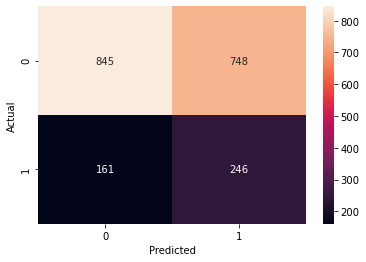

F1:
0.35117773019271953
Accuracy
0.5455


In [52]:
#Reprint original cf to compare
data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

#Calculate F1 and accuray score
print("F1:")
print(f1_score(y_test,y_pred))
print("Accuracy")
print(accuracy_score(y_test,y_pred))

### EM

Churn on test dataset:
[0.7965 0.2035]
Churned predicted by EM:
[0.497 0.503]


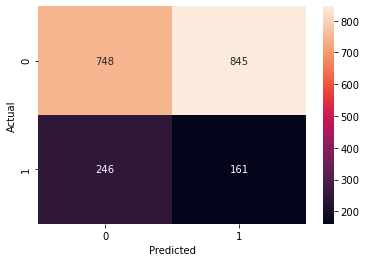

F1:
0.2278839348903043
Accuracy
0.4545


In [53]:
#Build and Fit model
EM_model_ICA = EM(n_components=2,covariance_type='diag',n_init=1,warm_start=True,random_state=100).fit(X_train_ICA)
EM_model_fit_ICA = EM_model_ICA.fit(X_train_ICA,y_train_ICA)

#Predict labels
y_pred_EM_ICA =  EM_model_fit_ICA.predict(X_test_ICA)
y_pred_EM_ICA

#Churn on test set
unique_t_ICA, counts_t_ICA = np.unique(y_test_ICA, return_counts=True)
Churn_rate_test_ICA = counts_t_ICA / len(y_test_ICA)
print("Churn on test dataset:")
print(Churn_rate_test_ICA)

#Predicted churn
unique_EM_ICA, counts_EM_ICA = np.unique(y_pred_EM_ICA, return_counts=True)
Churn_rate_y_EM_ICA = counts_EM_ICA / len(y_pred_EM_ICA)
print("Churned predicted by EM:")
print(Churn_rate_y_EM_ICA)
#print(counts)
#Churn_rate_y = Churn_rate.to_frame()
#dict(zip(unique, counts))
#counts

data1 = {'y_Actual':   y_test_ICA,
        'y_Predicted': y_pred_EM_ICA
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

#Calculate F1 and accuracy
print("F1:")
print(f1_score(y_test_ICA,y_pred_EM_ICA))
print("Accuracy")
print(accuracy_score(y_test_ICA,y_pred_EM_ICA))

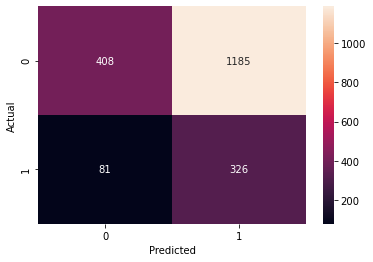

F1:
0.33993743482794575
Accuracy
0.367


In [54]:
#Create confussion matrix to compare
data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred_EM
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

#Calculate F1 and accuracy
print("F1:")
print(f1_score(y_test,y_pred_EM))
print("Accuracy")
print(accuracy_score(y_test,y_pred_EM))

## RCA

In [55]:
#Splitting data into test and train datasets
X_train_RCA, X_test_RCA, y_train_RCA, y_test_RCA = train_test_split(finalDf_RCA.drop(columns='Exited'), finalDf_RCA['Exited'], test_size = 0.2, random_state = 0, stratify=y)


### Kmeans

Churn on test dataset:
[0.7965 0.2035]
Churned predicted by Kmeans:
[0.5045 0.4955]


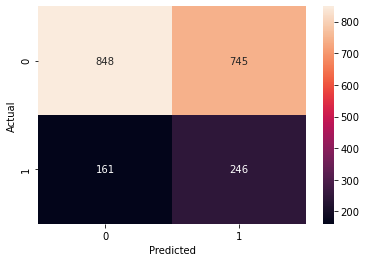

F1:
0.351931330472103
Accuracy
0.547


In [56]:
#Create and fit model
KM_model_RCA = KMeans(n_clusters=2,n_init=10,random_state=100) 
KM_model_fit_RCA = KM_model_RCA.fit(X_train_RCA,y_train_RCA)

#Predict label
y_pred_RCA =  KM_model_fit_RCA.predict(X_test_RCA)

#Churn on test set
unique_t_RCA, counts_t_RCA = np.unique(y_test_RCA, return_counts=True)
Churn_rate_test_RCA = counts_t_RCA / len(y_test_RCA)
print("Churn on test dataset:")
print(Churn_rate_test_RCA)

#Predicted churn
unique_RCA, counts_RCA = np.unique(y_pred_RCA, return_counts=True)
Churn_rate_y_RCA = counts_RCA / len(y_pred_RCA)
print("Churned predicted by Kmeans:")
print(Churn_rate_y_RCA)
#print(counts)
#Churn_rate_y = Churn_rate.to_frame()
dict(zip(unique_RCA, counts_RCA))
#counts

data1 = {'y_Actual':   y_test_RCA,
        'y_Predicted': y_pred_RCA
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

#Calculate F1 and accuracy
print("F1:")
print(f1_score(y_test_RCA,y_pred_RCA))
print("Accuracy")
print(accuracy_score(y_test_RCA,y_pred_RCA))

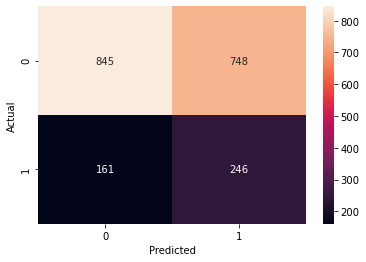

F1:
0.35117773019271953
Accuracy
0.5455


In [57]:
#Reprint original cf to compare
data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

#Calculate F1 and accuray score
print("F1:")
print(f1_score(y_test,y_pred))
print("Accuracy")
print(accuracy_score(y_test,y_pred))

### EM

Churn on test dataset:
[0.7965 0.2035]
Churned predicted by EM:
[0.5035 0.4965]


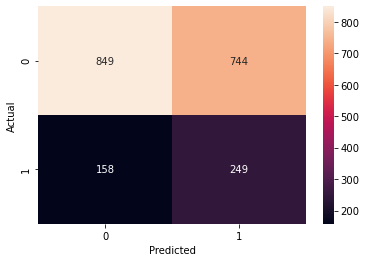

F1:
0.35571428571428576
Accuracy
0.549


In [58]:
#Build and Fit model
EM_model_RCA = EM(n_components=2,covariance_type='diag',n_init=1,warm_start=True,random_state=100).fit(X_train_RCA)
EM_model_fit_RCA = EM_model_RCA.fit(X_train_RCA,y_train_RCA)

#Predict labels
y_pred_EM_RCA =  EM_model_fit_RCA.predict(X_test_RCA)
y_pred_EM_RCA

#Churn on test set
unique_t_RCA, counts_t_RCA = np.unique(y_test_RCA, return_counts=True)
Churn_rate_test_RCA = counts_t_RCA / len(y_test_RCA)
print("Churn on test dataset:")
print(Churn_rate_test_RCA)

#Predicted churn
unique_EM_RCA, counts_EM_RCA = np.unique(y_pred_EM_RCA, return_counts=True)
Churn_rate_y_EM_RCA = counts_EM_RCA / len(y_pred_EM_RCA)
print("Churned predicted by EM:")
print(Churn_rate_y_EM_RCA)
#print(counts)
#Churn_rate_y = Churn_rate.to_frame()
#dict(zip(unique, counts))
#counts

#Create confussion matrix to compare
#cm= confusion_matrix(y_test,y_pred)

#Confusion Matrix 
#tn, fp, fn, tp = cm.ravel()
#print(tn, fp, fn, tp)

data1 = {'y_Actual':   y_test_RCA,
        'y_Predicted': y_pred_EM_RCA
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

#Calculate F1 and accuracy
print("F1:")
print(f1_score(y_test_RCA,y_pred_EM_RCA))
print("Accuracy")
print(accuracy_score(y_test_RCA,y_pred_EM_RCA))

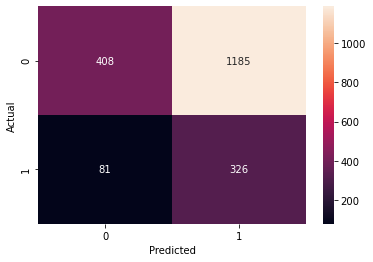

F1:
0.33993743482794575
Accuracy
0.367


In [59]:
#Create confussion matrix to compare
data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred_EM
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

#Calculate F1 and accuracy
print("F1:")
print(f1_score(y_test,y_pred_EM))
print("Accuracy")
print(accuracy_score(y_test,y_pred_EM))

### LDA

In [60]:
#Transformation by LDA
lda_1 = LDA(n_components = 1, solver='eigen', shrinkage='auto')
X_train_lda = lda_1.fit_transform(X_train, y_train)
X_test_lda = lda_1.transform(X_test)

In [61]:
sc3 = StandardScaler()
X_train_lda_sc = sc3.fit_transform(X_train_lda)
X_test_lda_sc = sc3.transform(X_test_lda)

### Kmeans

Churn on test dataset:
[0.7965 0.2035]
Churned predicted by Kmeans:
[0.5605 0.4395]


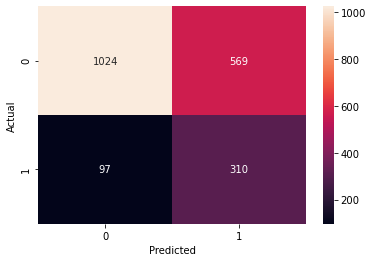

F1:
0.48211508553654747
Accuracy
0.667


In [62]:
#Create and fit model
KM_model_LDA = KMeans(n_clusters=2,n_init=10,random_state=100) 
KM_model_fit_LDA = KM_model_LDA.fit(X_train_lda_sc,y_train)

#Predict label
y_pred_LDA =  KM_model_fit_LDA.predict(X_test_lda_sc)

#Churn on test set
unique_t_LDA, counts_t_LDA = np.unique(y_test, return_counts=True)
Churn_rate_test_LDA = counts_t_LDA / len(y_test)
print("Churn on test dataset:")
print(Churn_rate_test_LDA)

#Predicted churn
unique_LDA, counts_LDA = np.unique(y_pred_LDA, return_counts=True)
Churn_rate_y_LDA = counts_LDA / len(y_pred_LDA)
print("Churned predicted by Kmeans:")
print(Churn_rate_y_LDA)
#print(counts)
#Churn_rate_y = Churn_rate.to_frame()
dict(zip(unique_LDA, counts_LDA))
#counts

data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred_LDA
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

#Calculate F1 and accuracy
print("F1:")
print(f1_score(y_test,y_pred_LDA))
print("Accuracy")
print(accuracy_score(y_test,y_pred_LDA))

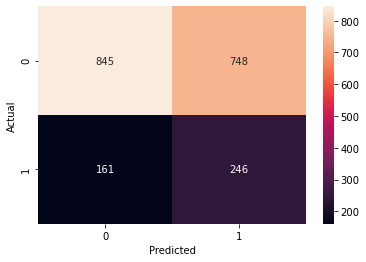

F1:
0.35117773019271953
Accuracy
0.5455


In [63]:
#Reprint original cf to compare
data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

#Calculate F1 and accuray score
print("F1:")
print(f1_score(y_test,y_pred))
print("Accuracy")
print(accuracy_score(y_test,y_pred))

### EM

Churn on test dataset:
[0.7965 0.2035]
Churned predicted by EM:
[0.641 0.359]


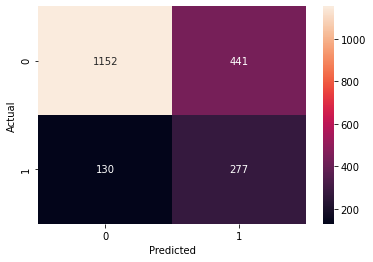

F1:
0.4924444444444444
Accuracy
0.7145


In [64]:
#Build and Fit model
EM_model_LDA = EM(n_components=2,covariance_type='diag',n_init=1,warm_start=True,random_state=100).fit(X_train_lda_sc)
EM_model_fit_LDA = EM_model_LDA.fit(X_train_lda_sc,y_train)

#Predict labels
y_pred_EM_LDA =  EM_model_fit_LDA.predict(X_test_lda_sc)
y_pred_EM_LDA

#Churn on test set
unique_t_LDA, counts_t_LDA = np.unique(y_test, return_counts=True)
Churn_rate_test_LDA = counts_t_LDA / len(y_test)
print("Churn on test dataset:")
print(Churn_rate_test_LDA)

#Predicted churn
unique_EM_LDA, counts_EM_LDA = np.unique(y_pred_EM_LDA, return_counts=True)
Churn_rate_y_EM_LDA = counts_EM_LDA / len(y_pred_EM_LDA)
print("Churned predicted by EM:")
print(Churn_rate_y_EM_LDA)
#print(counts)
#Churn_rate_y = Churn_rate.to_frame()
#dict(zip(unique, counts))
#counts

#Create confussion matrix to compare
#cm= confusion_matrix(y_test,y_pred)

#Confusion Matrix 
#tn, fp, fn, tp = cm.ravel()
#print(tn, fp, fn, tp)

data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred_EM_LDA
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

#Calculate F1 and accuracy
print("F1:")
print(f1_score(y_test,y_pred_EM_LDA))
print("Accuracy")
print(accuracy_score(y_test,y_pred_EM_LDA))

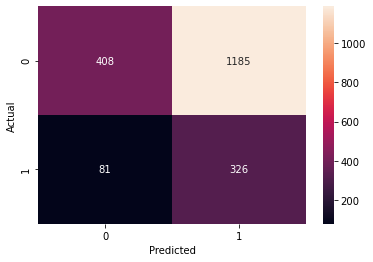

F1:
0.33993743482794575
Accuracy
0.367


In [65]:
#Create confussion matrix to compare
data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred_EM
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

#Calculate F1 and accuracy
print("F1:")
print(f1_score(y_test,y_pred_EM))
print("Accuracy")
print(accuracy_score(y_test,y_pred_EM))

# Run NN

## STD Data

In [66]:
##Neuronal Network
from sklearn.neural_network import MLPClassifier
#NN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)


#Default
NN_d = MLPClassifier(max_iter=25)

NN_d.fit(X_train, y_train)
asd = NN_d.predict_proba(X_test[:1])
y_pred_NN_d = NN_d.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_NN_d))
print(asd)
#cross_val_score(clf, iris.data, iris.target, cv=10)

 

Accuracy: 0.855
[[0.8134324 0.1865676]]


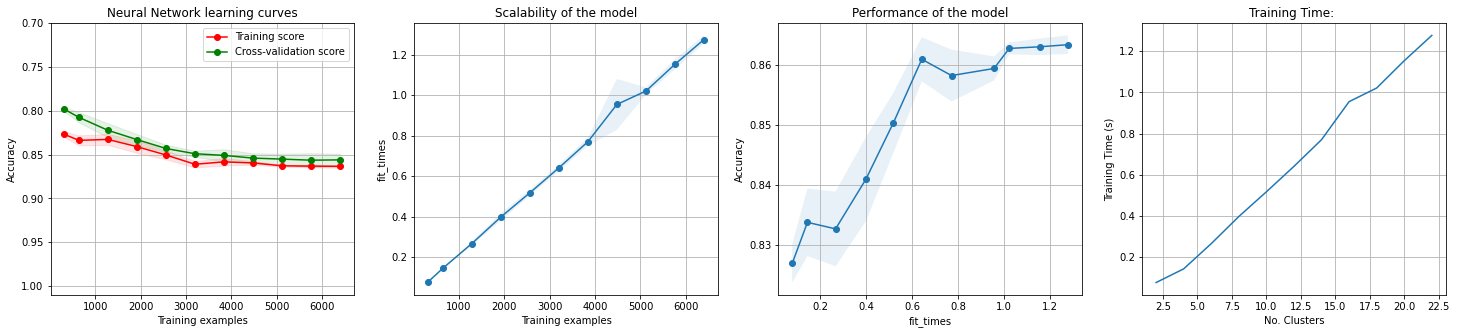

Accuracy: 0.857


In [67]:
g_NN_d = plot_learning_curve(NN_d.fit(X_train, y_train), "Neural Network learning curves", X_train, y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

NN_d_2 = NN_d.fit(X_train, y_train)
y_pred_NN_d_2 = NN_d_2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_NN_d_2))
#cross_val_score(clf, iris.data, iris.target, cv=10)
#cross_val_score(clf, iris.data, iris.target, cv=10)

In [68]:
print(classification_report(y_test, y_pred_NN_d))

#Checking performance our model with ROC Score.
#roc_auc_score(y_test, y_pred_NN_d)

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1593
           1       0.76      0.42      0.54       407

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.85      0.84      2000



In [ ]:
NN_GS = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.5],
    'learning_rate': ['constant','adaptive',]
    #'max_iter': [25,50,75,100,125,150,175,200],
}

NN_GSed = GridSearchCV(NN_GS, parameter_space, n_jobs=-1, cv=5)
NN_GSed.fit(X_train, y_train) # X is train samples and y is the corresponding labels

print('Best parameters found:\n', NN_GSed.best_params_)
#DT_GS = clf_GS.best_estimator_.get_params()['dec_tree']
#DT_GS.fit(X_train, y_train)
#y_pred = DT_GS.predict(X_test)

#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#cross_val_score(clf, iris.data, iris.target, cv=10)


In [ ]:
NN = MLPClassifier(activation= 'relu', alpha= 0.5, hidden_layer_sizes= (10, 30, 10), learning_rate= 'adaptive', solver= 'adam')

g_NN = plot_learning_curve(NN.fit(X_train, y_train), "Neural Network learning curves", X_train, y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

NN_2 = NN.fit(X_train, y_train)
y_pred_NN_2 = NN_2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_NN_2))
#cross_val_score(clf, iris.data, iris.target, cv=10)
#cross_val_score(clf, iris.data, iris.target, cv=10)

In [ ]:
print(classification_report(y_test, y_pred_NN_2))

#Checking performance our model with ROC Score.
#roc_auc_score(y_test, y_pred_NN_2)

In [ ]:
#Confusion Matrix - default
y_pred_m_NN_d = NN_d.predict(X_test)
print(confusion_matrix(y_test,y_pred_m_NN_d))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_m_NN_d).ravel()
#print(tn, fp, fn, tp)

data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred_m_NN_d
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

In [ ]:
#Confusion Matrix - default
y_pred_m_NN = NN_2.predict(X_test)
print(confusion_matrix(y_test,y_pred_m_NN))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_m_NN).ravel()
#print(tn, fp, fn, tp)

data1 = {'y_Actual':   y_test,
        'y_Predicted': y_pred_m_NN
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

## PCA Data

In [ ]:
NN_GS_PCA = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.5],
    'learning_rate': ['constant','adaptive',]
    #'max_iter': [25,50,75,100,125,150,175,200],
}

NN_GSed_PCA = GridSearchCV(NN_GS_PCA, parameter_space, n_jobs=-1, cv=5)
NN_GSed_PCA.fit(X_train_PCA, y_train_PCA) # X is train samples and y is the corresponding labels

print('Best parameters found:\n', NN_GSed_PCA.best_params_)



In [ ]:
NN_PCA = MLPClassifier(activation= 'relu', alpha= 0.5, hidden_layer_sizes= (10, 30, 10), learning_rate= 'constant', solver= 'adam')

g_NN_PCA = plot_learning_curve(NN_PCA.fit(X_train_PCA, y_train_PCA), "Neural Network PCA learning curves", X_train_PCA, y_train_PCA,
                        ylim = [0.7,1.01], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

NN_2_PCA = NN_PCA.fit(X_train_PCA, y_train_PCA)
y_pred_NN_2_PCA = NN_2_PCA.predict(X_test_PCA)

print("Accuracy:",metrics.accuracy_score(y_test_PCA, y_pred_NN_2_PCA))
print(classification_report(y_test_PCA, y_pred_NN_2_PCA))

In [ ]:
#Confusion Matrix - PCA
y_pred_m_NN_PCA = NN_2_PCA.predict(X_test_PCA)
print(confusion_matrix(y_test_PCA,y_pred_m_NN_PCA))
tn, fp, fn, tp = confusion_matrix(y_test_PCA,y_pred_m_NN_PCA).ravel()
#print(tn, fp, fn, tp)

data1 = {'y_Actual':   y_test_PCA,
        'y_Predicted': y_pred_m_NN_PCA
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()

## ICA Data

In [ ]:
NN_GS_ICA = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.5],
    'learning_rate': ['constant','adaptive',]
    #'max_iter': [25,50,75,100,125,150,175,200],
}

NN_GSed_ICA = GridSearchCV(NN_GS_ICA, parameter_space, n_jobs=-1, cv=5)
NN_GSed_ICA.fit(X_train_ICA, y_train_ICA) # X is train samples and y is the corresponding labels

print('Best parameters found:\n', NN_GSed_ICA.best_params_)



In [ ]:
NN_ICA = MLPClassifier(activation= 'tanh', alpha= 0.0001, hidden_layer_sizes= (20,), learning_rate= 'constant', solver= 'adam')

g_NN_ICA = plot_learning_curve(NN_ICA.fit(X_train_ICA, y_train_ICA), "Neural Network ICA learning curves", X_train_ICA, y_train_ICA,
                        ylim = [0.7,1.01], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

NN_2_ICA = NN_ICA.fit(X_train_ICA, y_train_ICA)
y_pred_NN_2_ICA = NN_2_ICA.predict(X_test_ICA)

print("Accuracy:",metrics.accuracy_score(y_test_ICA, y_pred_NN_2_ICA))
print(classification_report(y_test_ICA, y_pred_NN_2_ICA))

In [ ]:
#Confusion Matrix - ICA
y_pred_m_NN_ICA = NN_2_ICA.predict(X_test_ICA)
print(confusion_matrix(y_test_ICA,y_pred_m_NN_ICA))
tn, fp, fn, tp = confusion_matrix(y_test_ICA,y_pred_m_NN_ICA).ravel()
#print(tn, fp, fn, tp)

data1 = {'y_Actual':   y_test_ICA,
        'y_Predicted': y_pred_m_NN_ICA
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix_df = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.show()